# Causality Worked Example
<div style="text-align: right">INFO 7390 Advances Data Sci/Architecture SEC 03 Spring 2024</div>
<div style="text-align: right">Nidhi Kulkarni</div>



## Worked Example 1

This dataset describes the usage statistics of various apps on a phone. The data includes overall notifications, app notifications, name of the app, number of time the phone is unlocked and the number of times the app is opened.

First let us analyse the data and perform EDA to understand the data.

In [1]:
import numpy as np # linear algebra
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

url1 ='https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/Causal_Inference/Spring_2024/Screentime%20-%20Overall%20Usage.csv'
url2 ='https://raw.githubusercontent.com/nikbearbrown/INFO_7390_Art_and_Science_of_Data/main/Causal_Inference/Spring_2024/Screentime%20-%20App%20Details.csv'


In [2]:
# Assuming df1 and df2 are your two datasets/DataFrames
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)
# Concatenate the datasets along the rows (axis=0)
df = pd.merge(df1, df2, on='Date', how='inner')

# Reset index
df.reset_index(drop=True, inplace=True)


In [3]:
df.rename(columns={'Notifications_x': 'Overall_Notifications', 'Notifications_y': 'App_Notifications'}, inplace=True)

In [4]:
df.head()

,Date,Total Usage,Overall_Notifications,Unlocks,Usage,App_Notifications,Times opened,App
0,08/26/2022,236,600,102,38,70,49,Instagram
1,08/26/2022,236,600,102,82,209,105,Whatsapp
2,08/27/2022,194,411,96,39,43,48,Instagram
3,08/27/2022,194,411,96,69,111,68,Whatsapp
4,08/28/2022,301,709,114,64,231,55,Instagram


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

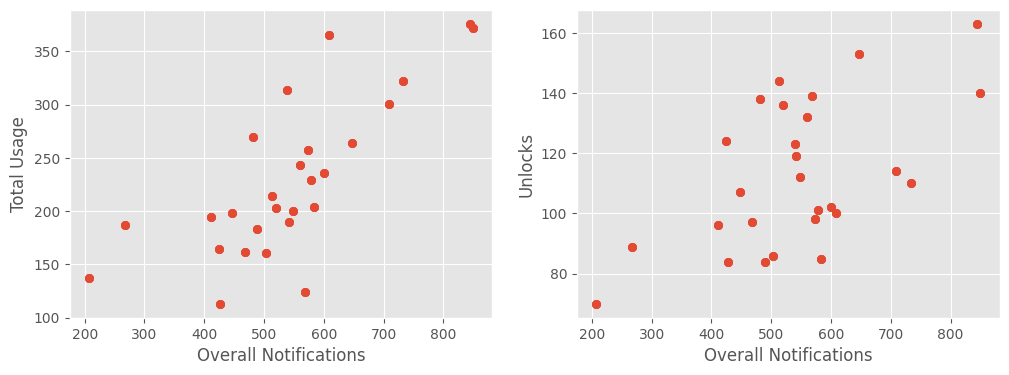

In [6]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Using 'scatter' instead of 'scatterplot' for matplotlib
ax[0].scatter(df['Overall_Notifications'], df['Total Usage'])
ax[1].scatter(df['Overall_Notifications'], df['Unlocks'])

# Setting labels for clarity
ax[0].set_xlabel('Overall Notifications')
ax[0].set_ylabel('Total Usage')
ax[1].set_xlabel('Overall Notifications')
ax[1].set_ylabel('Unlocks')

plt.show()


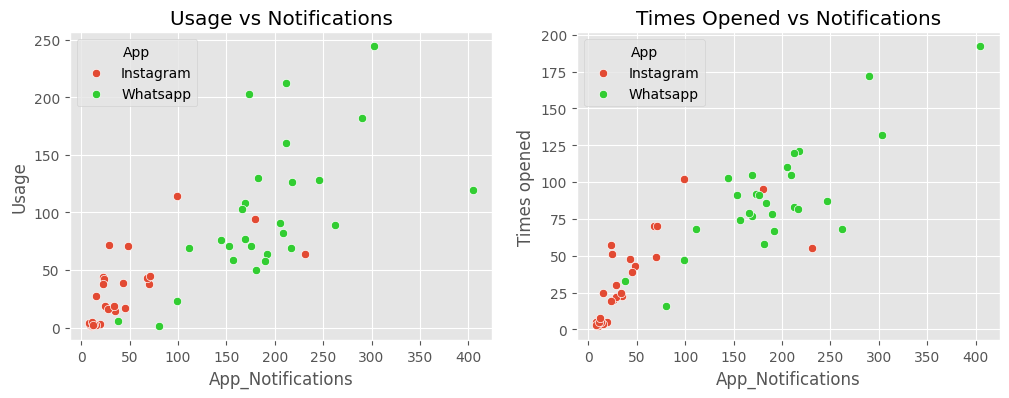

In [7]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))

# Assuming 'ad' is your DataFrame and it contains columns named 'App', 'Notifications', 'Usage', and 'Times opened'
# Plotting Instagram data
sns.scatterplot(ax=ax[0], data=df[df['App'] == 'Instagram'], x='App_Notifications', y='Usage', label='Instagram')
sns.scatterplot(ax=ax[1], data=df[df['App'] == 'Instagram'], x='App_Notifications', y='Times opened', label='Instagram')

# Plotting WhatsApp data
sns.scatterplot(ax=ax[0], data=df[df['App'] == 'Whatsapp'], x='App_Notifications', y='Usage', color='limegreen', label='Whatsapp')
sns.scatterplot(ax=ax[1], data=df[df['App'] == 'Whatsapp'], x='App_Notifications', y='Times opened', color='limegreen', label='Whatsapp')

# Adding legend and labels for clarity
ax[0].legend(title='App')
ax[1].legend(title='App')
ax[0].set_title('Usage vs Notifications')
ax[1].set_title('Times Opened vs Notifications')

plt.show()


### Performing OLS Regression

Let us perform OLS Regression to understand the relationships between the parameters.

In [8]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

model_total_usage = smf.ols('Q("Total Usage") ~ Q("Overall_Notifications") + C(App)', data=df).fit()
print(model_total_usage.summary())

model_times_opened = smf.ols('Q("Times opened") ~ Q("App_Notifications") + C(App)', data=df).fit()
print(model_times_opened.summary())


                            OLS Regression Results                            
Dep. Variable:       Q("Total Usage")   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     34.30
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           3.64e-10
Time:                        22:32:54   Log-Likelihood:                -284.90
No. Observations:                  54   AIC:                             575.8
Df Residuals:                      51   BIC:                             581.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

The OLS results allow us to make some inferences about the relationship between notifications and app usage, as well as notifications and the number of times an app is opened. 

**R-squared (0.574):** Approximately 57.4% of the variance in total app usage is explained by the number of overall notifications and the app being used. This is a moderately strong relationship.

**Coefficient for Overall_Notifications (0.3916):** This positive coefficient suggests that there is an association between the number of overall notifications and the total usage of the app. For each additional notification, the total usage increases by approximately 0.3916 units (assumed to be minutes or some other unit of time).

**Coefficient for App (WhatsApp):** The coefficient for WhatsApp is statistically insignificant (p-value of 1.000), indicating no detectable difference in the total usage attributable to the app being WhatsApp versus the baseline app (potentially Instagram).

### Inference for Causality

The positive associations indicate that there is a link between notifications and increased engagement with the apps.

The lack of significance for the app being WhatsApp suggests that the app itself may not be a differentiating factor in this sample for usage and openings when compared to Instagram.

The adjusted R-squared values imply that other unobserved variables might explain a portion of the variability in app engagement.

Potential confounders such as user demographics, day of the week, and individual preferences were not controlled for in the models, which could bias the results.


## Worked Example 2

Let's consider a healthcare scenario where we want to evaluate the effect of a new diet program on weight loss. We'll create a simulated dataset that includes a binary variable indicating participation in the diet program, some covariates that might affect weight loss, and a weight loss score as the outcome.

The data frame includes the below:

patient_id: Unique identifier for each patient.

age: Age of the patient.

gender: Gender of the patient.

baseline_BMI: Body Mass Index of the patient before the diet program.

diet_program: Whether the patient participated in the new diet program (1 for participation, 0 for no 
participation).

weight_loss: Weight loss in kilograms after 6 months.

In [9]:
import pandas as pd
import numpy as np

# Set the seed for reproducibility
np.random.seed(42)

# Simulate the dataset
num_patients = 500
patient_ids = range(num_patients)
ages = np.random.randint(18, 65, size=num_patients)
genders = np.random.choice(['Male', 'Female'], size=num_patients)
baseline_BMIs = np.random.normal(30, 5, size=num_patients)  # Average BMI with some variation
diet_program = np.random.binomial(1, 0.5, size=num_patients)  # 50% chance of participating in the diet program
weight_loss = np.random.normal(5, 2, size=num_patients) * diet_program  # Average weight loss with some variation, only for treated group

# Create a DataFrame
df = pd.DataFrame({
    'patient_id': patient_ids,
    'age': ages,
    'gender': genders,
    'baseline_BMI': baseline_BMIs,
    'diet_program': diet_program,
    'weight_loss': weight_loss
})

# Add a little noise to weight loss based on covariates
df['weight_loss'] += df['baseline_BMI'] / 10 - df['age'] / 100

df.head()

,patient_id,age,gender,baseline_BMI,diet_program,weight_loss
0,0,56,Male,26.501372,0,2.090137
1,1,46,Male,31.069900,0,2.646990
2,2,32,Male,29.438360,1,4.666013
3,3,60,Male,28.895152,1,7.656235
4,4,25,Male,33.070834,1,8.026464


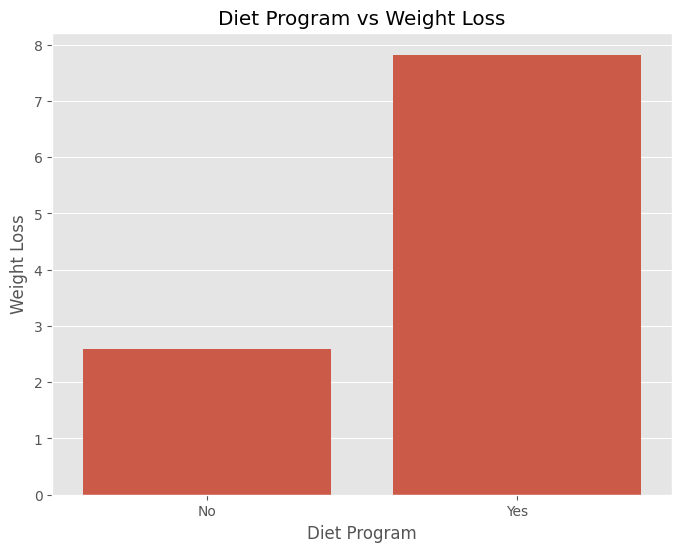

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x='diet_program', y='weight_loss', data=df, errorbar=None)
plt.title('Diet Program vs Weight Loss')
plt.xlabel('Diet Program')
plt.ylabel('Weight Loss')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [11]:
from sklearn.linear_model import LogisticRegression

# Convert 'gender' to a numeric binary variable for logistic regression
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Define covariates and treatment variable
covariates = ['age', 'gender', 'baseline_BMI']
treatment = 'diet_program'

# Perform logistic regression to calculate propensity scores
logit_model = LogisticRegression()
X = df[covariates]
y = df[treatment]
logit_model.fit(X, y)
df['propensity_score'] = logit_model.predict_proba(X)[:, 1]

# Perform PSM using nearest neighbors
from sklearn.neighbors import NearestNeighbors

# Create separate dataframes for treatment and control groups
treatment_df = df[df[treatment] == 1]
control_df = df[df[treatment] == 0]

# Fit the Nearest Neighbors model on control group
nn = NearestNeighbors(n_neighbors=1, algorithm='ball_tree')
nn.fit(control_df[['propensity_score']])

# Find matches for the treatment group
distances, indices = nn.kneighbors(treatment_df[['propensity_score']])
matched_control = control_df.iloc[indices.flatten()]

# Combine the matched treatment and control patients
matched_df = pd.concat([treatment_df, matched_control]).reset_index(drop=True)

# Evaluate the average treatment effect on the treated (ATT)
att = matched_df[matched_df['diet_program'] == 1]['weight_loss'].mean() - \
      matched_df[matched_df['diet_program'] == 0]['weight_loss'].mean()

print(f"The estimated ATT of the diet program on weight loss is: {att:.2f} kg")


The estimated ATT of the diet program on weight loss is: 5.23 kg


An estimated Average Treatment Effect on the Treated (ATT) of 5.23 kg from the Propensity Score Matching (PSM) analysis indicates that, on average, participants in the diet program lost 5.23 kilograms more than non-participants. This result suggests that the diet program was effective in reducing weight among the participants.

Given that PSM attempts to control for confounding by matching participants with non-participants on observed characteristics, we can be more confident that the estimated effect size may be due to the treatment (diet program) itself.

## References

1. Kaggle - Screentime Dataset

MIT License

Copyright (c) 2024 Nidhi Nitin Kulkarni

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.